# Import the dependant Packages

In [1]:
using HierarchicalEOM  # this automatically loads `QuantumToolbox`
using CairoMakie  

# Define the system Hamiltonian

In [2]:
ϵ = -5
U = 10
σm = sigmam() # σ-
σz = sigmaz() # σz
II = qeye(2)  # identity matrix

# construct the annihilation operator for both spin-up and spin-down
# (utilize Jordan–Wigner transformation)
d_up = tensor(σm, II)
d_dn = tensor(-1 * σz, σm)
Hsys = ϵ * (d_up' * d_up + d_dn' * d_dn) + U * (d_up' * d_up * d_dn' * d_dn)


Quantum Object:   type=Operator   dims=[2, 2]   size=(4, 4)   ishermitian=true
4×4 SparseArrays.SparseMatrixCSC{ComplexF64, Int64} with 2 stored entries:
     ⋅           ⋅           ⋅          ⋅    
     ⋅      -5.0+0.0im       ⋅          ⋅    
     ⋅           ⋅      -5.0+0.0im      ⋅    
     ⋅           ⋅           ⋅          ⋅    

# Construct the Bath Objects

## referring to the litterature, for differenciate the two regimes we analyse the difference U/Γ

In [14]:
# Paramètres physiques
Γ_list = [0.5, 1.0, 2.0, 5.0, 10.0]  # U/Γ = 20, 10, 5, 2, 1 weak coupling
#Γ_list = [0.01, 0.02, 0.05, 0.1, 0.2]  # U/Γ = 1000, 500, 200, 100, 50 strong coupling
μ = 0.0                                      # chimic potential of réservoir
W = 10.0                                     # band width
kT = 0.5                                     # Temperature (k_B T)
N = 5                                        # Nb of exponentials terms (Padé)


bath_lists = Vector{Vector}(undef, length(Γ_list))  # Liste finale

for (i, γ) in pairs(Γ_list)
    bath_up = Fermion_Lorentz_Pade(d_up, γ, μ, W, kT, N)
    bath_dn = Fermion_Lorentz_Pade(d_dn, γ, μ, W, kT, N)
    bath_lists[i] = [bath_up, bath_dn]
end

# Construct HEOMLS Matrix

In [15]:
tier = 3                             # hierarchy troncature

M_even_list = Vector{Any}()          # even parity of super_operators
M_odd_list  = Vector{Any}()          # odd parity of super_operators

for k in bath_lists
    push!(M_even_list, M_Fermion(Hsys, tier, k))
    push!(M_odd_list,  M_Fermion(Hsys, tier, k, ODD))
end

Preparing block matrices for HEOM Liouvillian superoperator (using 1 threads)...
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)
Constructing matrix...[DONE]
Preparing block matrices for HEOM Liouvillian superoperator (using 1 threads)...
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)
Constructing matrix...[DONE]
Preparing block matrices for HEOM Liouvillian superoperator (using 1 threads)...
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)
Constructing matrix...[DONE]
Preparing block matrices for HEOM Liouvillian superoperator (using 1 threads)...
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)
Constructing matrix...[DONE]
Preparing block matrices for HEOM Liouvillian superoperator (using 1 threads)...
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m

# Solve stationary state of ADOs (Auxilliary Statistical Operators)

In [16]:
ados_s_list = [steadystate(k) for k in M_even_list]

Solving steady state for ADOs by linear-solve method...
Calculating left preconditioner with ilu...[DONE]
Solving linear problem...[DONE]
Solving steady state for ADOs by linear-solve method...
Calculating left preconditioner with ilu...[DONE]
Solving linear problem...[DONE]
Solving steady state for ADOs by linear-solve method...
Calculating left preconditioner with ilu...[DONE]
Solving linear problem...[DONE]
Solving steady state for ADOs by linear-solve method...
Calculating left preconditioner with ilu...[DONE]
Solving linear problem...[DONE]
Solving steady state for ADOs by linear-solve method...
Calculating left preconditioner with ilu...[DONE]
Solving linear problem...[DONE]


5-element Vector{ADOs}:
 2325 Auxiliary Density Operators with even-parity and (system) dims = [2, 2]

 2325 Auxiliary Density Operators with even-parity and (system) dims = [2, 2]

 2325 Auxiliary Density Operators with even-parity and (system) dims = [2, 2]

 2325 Auxiliary Density Operators with even-parity and (system) dims = [2, 2]

 2325 Auxiliary Density Operators with even-parity and (system) dims = [2, 2]


# Power Spectrum

In [17]:
ωlist = -20:1:20                      
colors = Makie.wong_colors()          

fig = Figure(size = (600, 350))
ax = Axis(fig[1, 1],
          xlabel = L"\omega",
          ylabel = L"S(\omega)",
          title = "Spectral density for various Gamma")
          

for (i, (M_odd, ados_s, Γ)) in enumerate(zip(M_odd_list, ados_s_list, Γ_list))
    p = PowerSpectrum(M_odd, ados_s, d_up, ωlist)
    lines!(ax, ωlist, p; color = colors[mod1(i, length(colors))], label = "Γ = $(Γ)")
end

#axislegend(ax; position = :rt)
#fig

Calculating power spectrum in frequency domain...
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 12s (ETA: 0h 00m 00s)
[DONE]
Calculating power spectrum in frequency domain...
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 11s (ETA: 0h 00m 00s)
[DONE]
Calculating power spectrum in frequency domain...
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 12s (ETA: 0h 00m 00s)
[DONE]
Calculating power spectrum in frequency domain...
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 15s (ETA: 0h 00m 00s)
[DONE]
Calculating power spectrum in frequency domain...
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 16s (ETA: 0h 00m 00s)
[DONE]


# Calculate density of states

$$    \pi A(\omega)=\textrm{Re}\left\{\int_0^\infty dt \left[\langle d(t) d^\dagger(0)\rangle^* + \langle d^\dagger(t) d(0)\rangle \right] e^{-i\omega t}\right\},
$$


Calculating density of states in frequency domain...
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 24s (ETA: 0h 00m 00s)
[DONE]
Calculating density of states in frequency domain...
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 25s (ETA: 0h 00m 00s)
[DONE]
Calculating density of states in frequency domain...
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 26s (ETA: 0h 00m 00s)
[DONE]
Calculating density of states in frequency domain...
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 31s (ETA: 0h 00m 00s)
[DONE]
Calculating density of states in frequency domain...
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 34s (ETA: 0h 00m 00s)
[DONE]


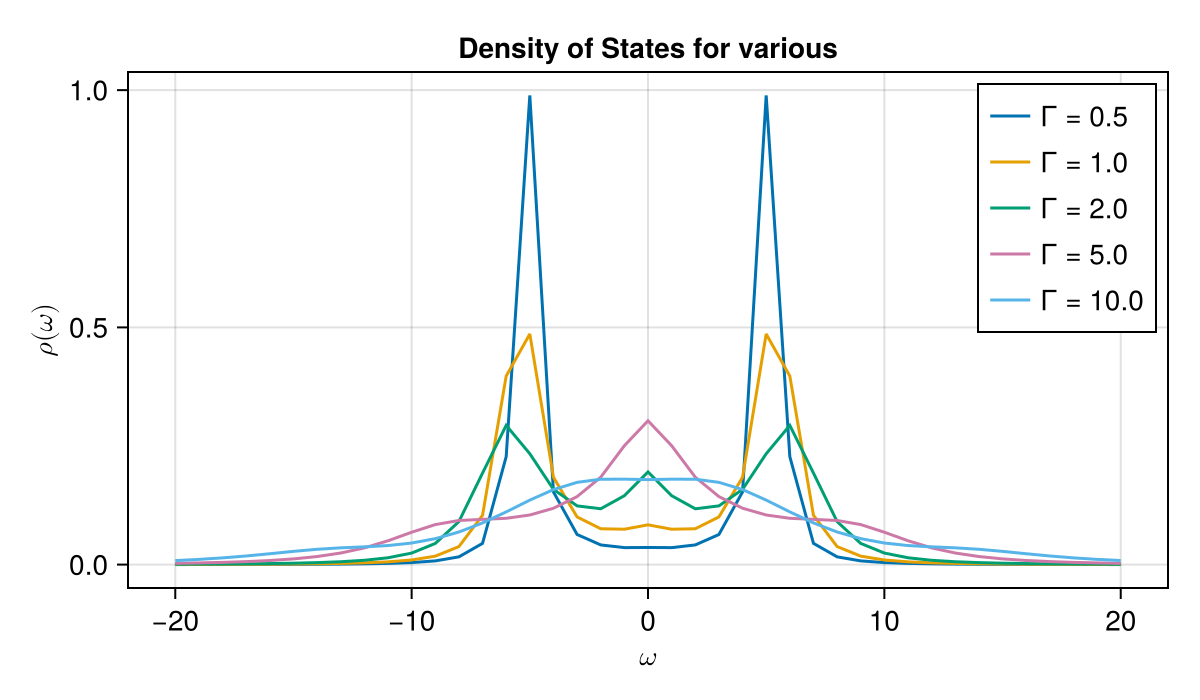

In [18]:
ωlist = -20:1:20
colors = Makie.wong_colors()

fig = Figure(size = (600, 350))
ax = Axis(fig[1, 1],
    xlabel = L"\omega",
    ylabel = L"\rho(\omega)",
    title = "Density of States for various")


for (i, (M_odd, ados_s, Γ)) in enumerate(zip(M_odd_list, ados_s_list, Γ_list))
    dos = DensityOfStates(M_odd, ados_s, d_up, ωlist)
    lines!(ax, ωlist, dos; color=colors[mod1(i, length(colors))], label = "Γ = $(Γ)")
end

axislegend(ax; position = :rt)

fig
#save("dos_jl.png", fig)

* Weak coupling: narrow Kondo peak, well-separated Hubbard bands

* Strong coupling: very broad Kondo peak, dominant correlation effects


### Notes

* ***LHB*** : Lower Hubbard Band ( $\omega = \epsilon + U$ )
* ***UHB*** : Upper Hubbard Band ( $\omega = \epsilon$ )
* ***Kondo*** : peak Kondo central

* ***Signature of strong correlations*** 
    The presence of Hubbard bands shows that the system cannot be described as a simple metal; electronic correlations are crucial
    
* ***Mott-Hubbard transition*** 
    When $U$ becomes very large, the Hubbard bands move away from each other and the Kondo peak disappears: the system becomes a Mott insulator.
    
* ***Spectroscopy*** 
    The Hubbard bands are experimentally accessible through out-of-equilibrium transport measurements (tunneling spectroscopy, STM, etc.)
    
* ***Complementarity with the Kondo peak***
    The Hubbard bands surround the Kondo peak, which is a subtle consequence of the mixing between empty and doubly occupied states allowed by the coupling to the reservoirs.

* In the case where the interactions become strong, we can note that the Kondo peak is suppressed and the Hubbard band diverges.

# CONCLUSION

At low temperature, the Kondo effect leads to a restoration of conductance even when the system is in the Coulomb blockade regime (where the current would normally be suppressed).